default_ind => Target Variable

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r"/home/aryan/Programs & Projects/Machine Learning/IMARTICUS DATA SCIENCE/CapStone Project/Python Project - Bank Lending")
data = pd.read_csv('XYZCorp_LendingData.txt', sep="\t", parse_dates=['issue_d'], low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
data.shape

(855969, 73)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           855969 non-null  int64         
 1   member_id                    855969 non-null  int64         
 2   loan_amnt                    855969 non-null  float64       
 3   funded_amnt                  855969 non-null  float64       
 4   funded_amnt_inv              855969 non-null  float64       
 5   term                         855969 non-null  object        
 6   int_rate                     855969 non-null  float64       
 7   installment                  855969 non-null  float64       
 8   grade                        855969 non-null  object        
 9   sub_grade                    855969 non-null  object        
 10  emp_title                    806526 non-null  object        
 11  emp_length                

In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [7]:
data.describe(include=object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290912,11,6,3,2,120335,14,60991,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


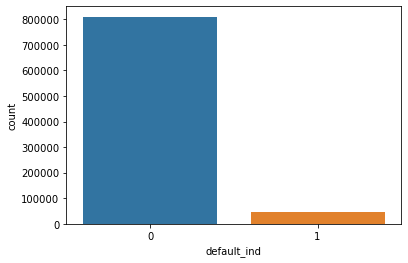

In [8]:
# Target Variable
sns.countplot('default_ind',data=data)

As we can see classs is highly imbalanced which will need treatment before running our models

In [9]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [10]:
data_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))
data_null[data_null > 0.60]

dti_joint                      0.999486
verification_status_joint      0.999484
annual_inc_joint               0.999484
il_util                        0.986438
mths_since_rcnt_il             0.984890
total_bal_il                   0.984476
inq_last_12m                   0.984476
open_acc_6m                    0.984476
open_il_6m                     0.984476
open_il_24m                    0.984476
open_il_12m                    0.984476
open_rv_12m                    0.984476
open_rv_24m                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
inq_fi                         0.984476
total_cu_tl                    0.984476
desc                           0.857691
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
dtype: float64

* 20 Variable can be removed 

In [11]:
null_cols = [x for x in data.count() < 855969*0.40]
data.drop(data.columns[null_cols], 1, inplace=True)

In [12]:
data.shape

(855969, 53)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          855969 non-null  int64         
 1   member_id                   855969 non-null  int64         
 2   loan_amnt                   855969 non-null  float64       
 3   funded_amnt                 855969 non-null  float64       
 4   funded_amnt_inv             855969 non-null  float64       
 5   term                        855969 non-null  object        
 6   int_rate                    855969 non-null  float64       
 7   installment                 855969 non-null  float64       
 8   grade                       855969 non-null  object        
 9   sub_grade                   855969 non-null  object        
 10  emp_title                   806526 non-null  object        
 11  emp_length                  812908 non-

In [14]:
data['policy_code'].value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [15]:
data_obj = data.select_dtypes(include=['object'])
for c in data_obj.columns:
    print("---- %s ---" % c)
    print(data_obj[c].value_counts())

---- term ---
 36 months    600221
 60 months    255748
Name: term, dtype: int64
---- grade ---
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64
---- sub_grade ---
B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64
---- emp_title ---
Teacher                                     12965
Manager                                     10821
Registered Nurse                             5341
RN                                           5182
Owner                                        5157
                                            ...  
Aircra

In [16]:
data_obj['emp_title'].value_counts()

Teacher                                     12965
Manager                                     10821
Registered Nurse                             5341
RN                                           5182
Owner                                        5157
                                            ...  
Aircraft Mechanic / Avionics Technician         1
wahrehouseman                                   1
Staffing assistant                              1
Moldsetter                                      1
Rec Leader 4 / parking enforcement offcr        1
Name: emp_title, Length: 290912, dtype: int64

In [17]:
data['zip_code']

0         860xx
1         309xx
2         606xx
3         917xx
4         972xx
          ...  
855964    905xx
855965    072xx
855966    378xx
855967    010xx
855968    331xx
Name: zip_code, Length: 855969, dtype: object

From Data:-
- policy_code is always == 1
- payment_plan has only __10 'y'__ values and __887372 'n'__ values
- id and member_id are all unique, which is a bit misleading. So every record is a unique customer
- application_type is 'INDIVIDUAL' for 99.94% of the records
- acc_now_delinq is 0 for 99.5% of the records
- emp_title not needed here, but it might be useful for the modelling (see below),
- zip_code not needed for this level of analysis,
- title can be removed as well.

In [18]:
vars_to_be_removed = ['policy_code', 'pymnt_plan', 'id', 'member_id', 'application_type', 
                      'acc_now_delinq','emp_title', 'zip_code','title']
data.drop( vars_to_be_removed , axis = 1, inplace = True )

In [19]:
data.shape

(855969, 44)

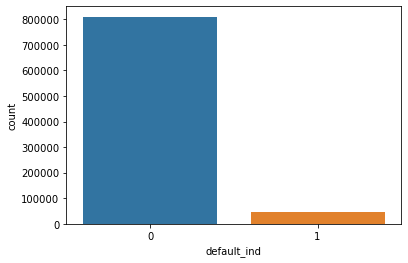

In [20]:
sns.countplot('default_ind',data=data)

In [21]:
list_1=data[data.columns].corr()['default_ind'][:]
data[data.columns].corr()['default_ind'][:]

loan_amnt                    -0.004907
funded_amnt                  -0.005797
funded_amnt_inv              -0.008209
int_rate                      0.155037
installment                   0.004753
annual_inc                   -0.037066
dti                           0.004429
delinq_2yrs                  -0.009186
inq_last_6mths                0.074407
mths_since_last_delinq        0.001317
open_acc                     -0.021698
pub_rec                      -0.019607
revol_bal                    -0.020696
revol_util                    0.044497
total_acc                    -0.021087
out_prncp                    -0.225960
out_prncp_inv                -0.225959
total_pymnt                  -0.039220
total_pymnt_inv              -0.040232
total_rec_prncp              -0.090336
total_rec_int                 0.046050
total_rec_late_fee            0.140760
recoveries                    0.475738
collection_recovery_fee       0.330764
last_pymnt_amnt              -0.087217
collections_12_mths_ex_me

__Removing columns with very low Correlation__

In [22]:
list_2=[]
for i in range(len(list_1)):
    if list_1[i]<0.02 and list_1[i]>(-0.02):
        list_2.append(list_1.index[i])

In [23]:
for i in range(len(list_2)):
    del data['{}'.format(list_2[i])]

In [24]:
data.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
0,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,credit_card,AZ,Jan-1985,1.0,3.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,NaN,NaN,0
1,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,car,GA,Apr-1999,5.0,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,NaN,NaN,1
2,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,small_business,IL,Nov-2001,2.0,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,NaN,NaN,0
3,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,other,CA,Feb-1996,1.0,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,NaN,NaN,0
4,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,other,OR,Jan-1996,0.0,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,NaN,NaN,0


In [25]:
data.shape

(855969, 34)

# Categrical data

## verification_status

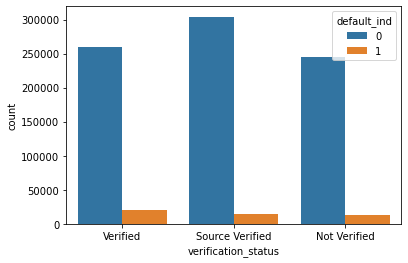

In [26]:
sns.countplot('verification_status',data=data,hue='default_ind')

In [27]:
df2 = pd.get_dummies(data['verification_status'], prefix='VStatus')
df2

,VStatus_Not Verified,VStatus_Source Verified,VStatus_Verified
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
855964,0,0,1
855965,0,0,1
855966,0,0,1
855967,0,1,0


In [28]:
del data['verification_status']

In [29]:
data=pd.concat([df2,data],axis=1)
data.head()

,VStatus_Not Verified,VStatus_Source Verified,VStatus_Verified,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
0,0,0,1,36 months,10.65,B,B2,10+ years,RENT,24000.0,2011-12-01,credit_card,AZ,Jan-1985,1.0,3.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,NaN,NaN,0
1,0,1,0,60 months,15.27,C,C4,< 1 year,RENT,30000.0,2011-12-01,car,GA,Apr-1999,5.0,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,NaN,NaN,1
2,1,0,0,36 months,15.96,C,C5,10+ years,RENT,12252.0,2011-12-01,small_business,IL,Nov-2001,2.0,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,NaN,NaN,0
3,0,1,0,36 months,13.49,C,C1,10+ years,RENT,49200.0,2011-12-01,other,CA,Feb-1996,1.0,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,NaN,NaN,0
4,0,1,0,60 months,12.69,B,B5,1 year,RENT,80000.0,2011-12-01,other,OR,Jan-1996,0.0,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,NaN,NaN,0


In [30]:
data.shape

(855969, 36)

## initial_list_status
__Replacing__

- F => 0
- W => 1

In [31]:
data['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [33]:
data['initial_list_status'] = np.where(data['initial_list_status']=='f', 0, data['initial_list_status'])
data['initial_list_status'] = np.where(data['initial_list_status']=='w', 1, data['initial_list_status'])
data['initial_list_status'].value_counts()

0    442555
1    413414
Name: initial_list_status, dtype: int64

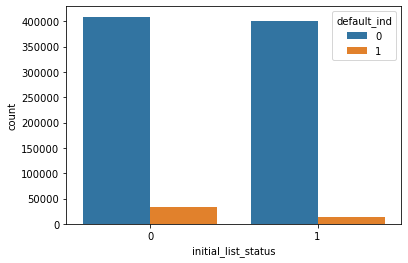

In [34]:
sns.countplot('initial_list_status',data=data,hue='default_ind')

In [35]:
data['initial_list_status']=data['initial_list_status'].astype(float)

# Term

In [36]:
data['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

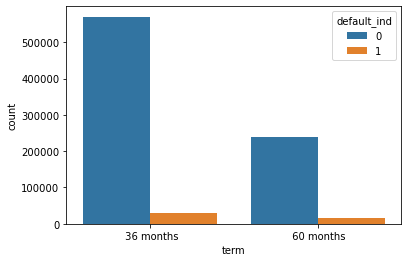

In [37]:
sns.countplot('term',data=data,hue='default_ind')

#### replacing
- 36 months => 0
- 60 months => 1

In [38]:
data['term'] = np.where(data['term']==' 36 months', 0, data['term'])
data['term'] = np.where(data['term']==' 60 months', 1, data['term'])
data['term'].value_counts()

0    600221
1    255748
Name: term, dtype: int64

In [39]:
data['term']=data['term'].astype(float)

# Grade


In [40]:
data['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

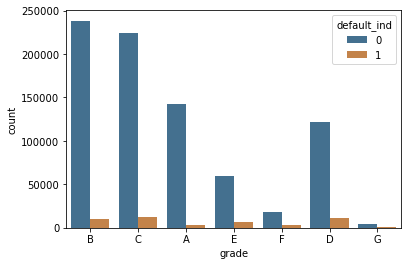

In [41]:
sns.countplot('grade',data=data,hue='default_ind',saturation=0.5)

In [42]:
data['grade'] = np.where(data['grade']=='A', 0, data['grade'])
data['grade'] = np.where(data['grade']=='B', 1, data['grade'])
data['grade'] = np.where(data['grade']=='C', 2, data['grade'])
data['grade'] = np.where(data['grade']=='D', 3, data['grade'])
data['grade'] = np.where(data['grade']=='E', 4, data['grade'])
data['grade'] = np.where(data['grade']=='F', 5, data['grade'])
data['grade'] = np.where(data['grade']=='G', 6, data['grade'])
data['grade'].value_counts()

1    247998
2    236855
0    145665
3    132802
4     66448
5     21328
6      4873
Name: grade, dtype: int64

In [43]:
data['grade']=data['grade'].astype(float)

# Home_Ownership

In [44]:
data['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

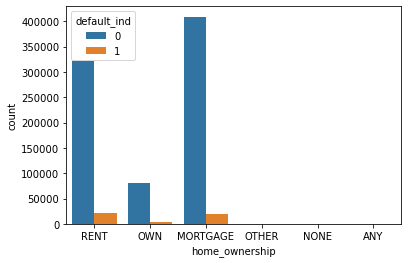

In [45]:
sns.countplot('home_ownership',data=data,hue='default_ind')

In [46]:
data['home_ownership'] = np.where(data['home_ownership']=='RENT', 0, data['home_ownership'])
data['home_ownership'] = np.where(data['home_ownership']=='OWN', 1, data['home_ownership'])
data['home_ownership'] = np.where(data['home_ownership']=='MORTGAGE', 2, data['home_ownership'])
data['home_ownership'] = np.where(data['home_ownership']=='NONE', 3, data['home_ownership'])
data['home_ownership'] = np.where(data['home_ownership']=='OTHER', 3, data['home_ownership'])
data['home_ownership'] = np.where(data['home_ownership']=='ANY', 4, data['home_ownership'])

data['home_ownership'].value_counts()

2    429106
0    342535
1     84136
3       189
4         3
Name: home_ownership, dtype: int64

In [47]:
data['home_ownership']=data['home_ownership'].astype(float)

In [ ]:
# df3=pd.get_dummies(data['home_ownership'], prefix='HOwn',drop_first=True)
# data=pd.concat([df3,data],axis=1)
# del data['home_ownership']
# data.head()

In [48]:
data.shape

(855969, 36)

# emp_length

In [49]:
data['emp_length'].value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [50]:
data['emp_length'] = np.where(data['emp_length']=='< 1 year', '0 year', data['emp_length'])

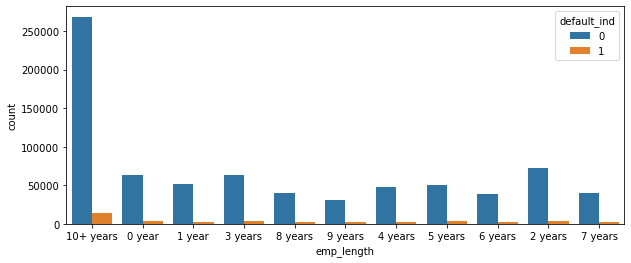

In [51]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('emp_length', ax=ax,data=data,hue='default_ind')

In [52]:
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)
data['emp_length'] = data['emp_length'].fillna(data.emp_length.median())

In [53]:
data.shape

(855969, 36)

# last_credit_pull_d

In [54]:
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'])
data['Month'] = data['last_credit_pull_d'].apply(lambda x: x.month)
data['Year'] = data['last_credit_pull_d'].apply(lambda x: x.year)
data = data.drop(['last_credit_pull_d'], axis = 1)

In [55]:
print('Data Shape: ', data.shape)
print('')
data.info()

Data Shape:  (855969, 37)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VStatus_Not Verified     855969 non-null  uint8         
 1   VStatus_Source Verified  855969 non-null  uint8         
 2   VStatus_Verified         855969 non-null  uint8         
 3   term                     855969 non-null  float64       
 4   int_rate                 855969 non-null  float64       
 5   grade                    855969 non-null  float64       
 6   sub_grade                855969 non-null  object        
 7   emp_length               855969 non-null  float64       
 8   home_ownership           855969 non-null  float64       
 9   annual_inc               855969 non-null  float64       
 10  issue_d                  855969 non-null  datetime64[ns]
 11  purpose                  855969 non-null  object   

In [56]:
data[data.columns].corr()['default_ind'][:]

VStatus_Not Verified      -0.016924
VStatus_Source Verified   -0.032761
VStatus_Verified           0.050291
term                       0.031378
int_rate                   0.155037
grade                      0.123656
emp_length                -0.013742
home_ownership            -0.033838
annual_inc                -0.037066
inq_last_6mths             0.074407
open_acc                  -0.021698
revol_bal                 -0.020696
revol_util                 0.044497
total_acc                 -0.021087
initial_list_status       -0.098812
out_prncp                 -0.225960
out_prncp_inv             -0.225959
total_pymnt               -0.039220
total_pymnt_inv           -0.040232
total_rec_prncp           -0.090336
total_rec_int              0.046050
total_rec_late_fee         0.140760
recoveries                 0.475738
collection_recovery_fee    0.330764
last_pymnt_amnt           -0.087217
tot_cur_bal               -0.036335
total_rev_hi_lim          -0.033620
default_ind                1

In [57]:
list_3=[]
for i in range(len(data.dtypes)):
    if data.dtypes[i]!='object':
        list_3.append(data.dtypes.index[i])

In [58]:
data=data[list_3]

In [59]:
data.isnull().sum()

VStatus_Not Verified           0
VStatus_Source Verified        0
VStatus_Verified               0
term                           0
int_rate                       0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
issue_d                        0
inq_last_6mths                 0
open_acc                       0
revol_bal                      0
revol_util                   446
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
tot_cur_bal                67313
total_rev_hi_lim           67313
default_ind                    0
Month                         50
Year      

In [60]:
del data['total_rev_hi_lim']

In [61]:
del data['tot_cur_bal']
print('Shape: ', data.shape)

Shape:  (855969, 29)


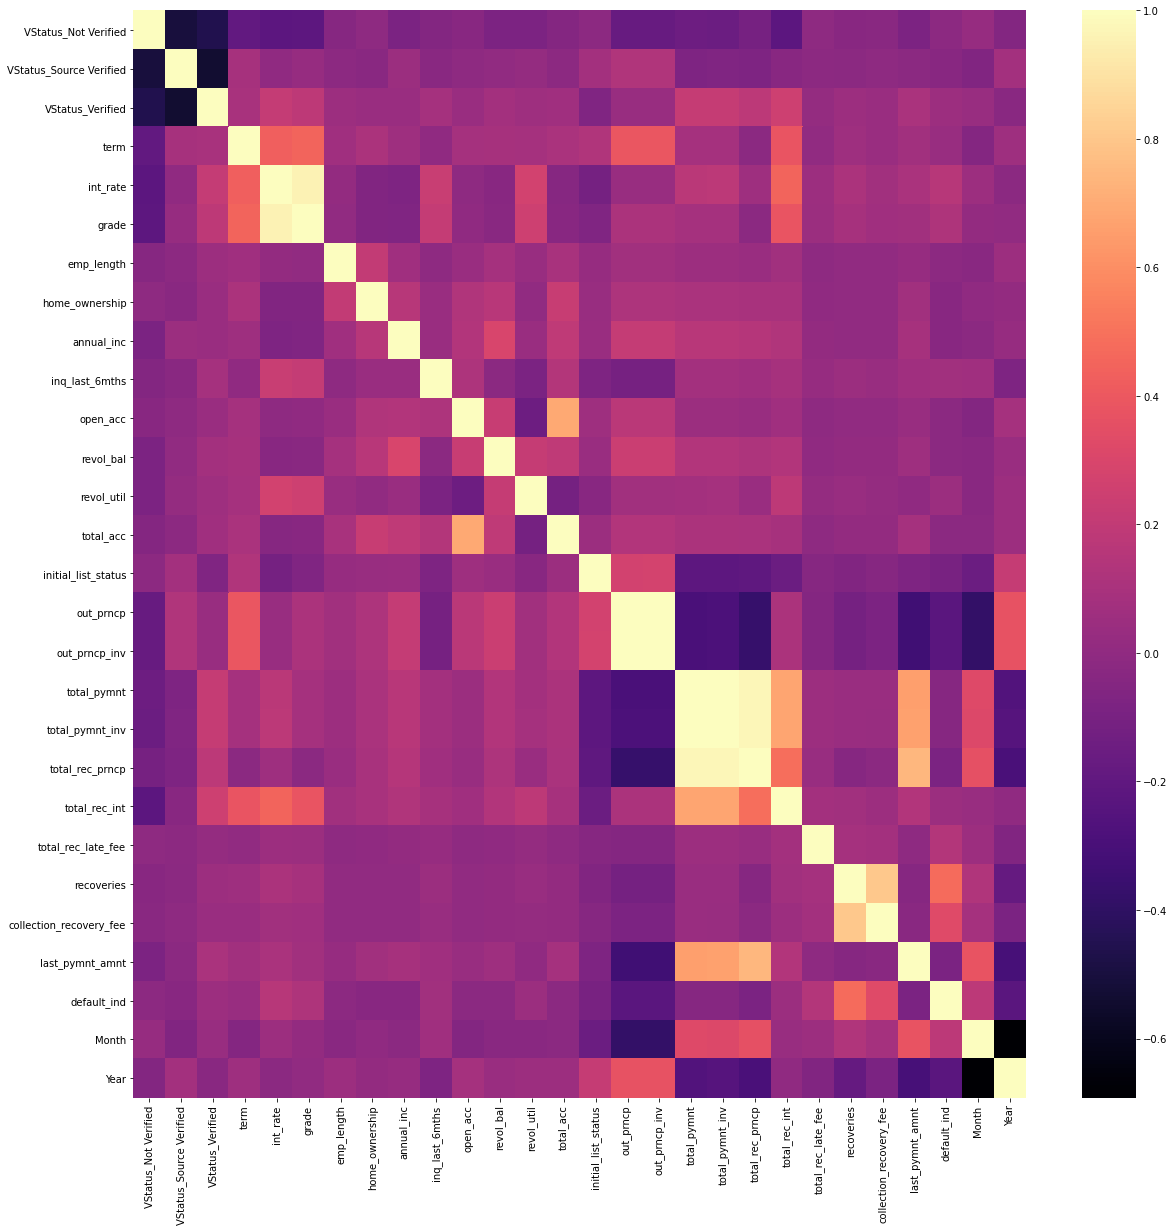

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=False,cmap='magma')

## Filling Null Values

In [63]:
data['revol_util'].fillna(data['revol_util'].mean(),inplace=True)
data['Month'].fillna(data.mode()['Month'][0],inplace=True)
data['Year'].fillna(data.mode()['Year'][0],inplace=True)

In [65]:
data.isnull().sum()

VStatus_Not Verified       0
VStatus_Source Verified    0
VStatus_Verified           0
term                       0
int_rate                   0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
issue_d                    0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
default_ind                0
Month                      0
Year                       0
dtype: int64

In [66]:
# For Ease Of use setting Target variable at the end

data['last']=data['default_ind']
del data['default_ind']
data['default_ind']=data['last']
del data['last']

In [67]:
del data['issue_d']

In [68]:
print('Final Data Shape: ', data.shape)

Final Data Shape:  (855969, 28)


In [69]:
print('Columns: ', data.columns)
data.head()

Columns:  Index(['VStatus_Not Verified', 'VStatus_Source Verified', 'VStatus_Verified',
       'term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'Month', 'Year', 'default_ind'],
      dtype='object')


,VStatus_Not Verified,VStatus_Source Verified,VStatus_Verified,term,int_rate,grade,emp_length,home_ownership,annual_inc,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,Month,Year,default_ind
0,0,0,1,0.0,10.65,1.0,10.0,0.0,24000.0,1.0,3.0,13648.0,83.7,9.0,0.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,2016.0,0
1,0,1,0,1.0,15.27,2.0,0.0,0.0,30000.0,5.0,3.0,1687.0,9.4,4.0,0.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,9.0,2013.0,1
2,1,0,0,0.0,15.96,2.0,10.0,0.0,12252.0,2.0,2.0,2956.0,98.5,10.0,0.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,2016.0,0
3,0,1,0,0.0,13.49,2.0,10.0,0.0,49200.0,1.0,10.0,5598.0,21.0,37.0,0.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,2015.0,0
4,0,1,0,1.0,12.69,1.0,1.0,0.0,80000.0,0.0,15.0,27783.0,53.9,38.0,0.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1.0,2016.0,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   VStatus_Not Verified     855969 non-null  uint8  
 1   VStatus_Source Verified  855969 non-null  uint8  
 2   VStatus_Verified         855969 non-null  uint8  
 3   term                     855969 non-null  float64
 4   int_rate                 855969 non-null  float64
 5   grade                    855969 non-null  float64
 6   emp_length               855969 non-null  float64
 7   home_ownership           855969 non-null  float64
 8   annual_inc               855969 non-null  float64
 9   inq_last_6mths           855969 non-null  float64
 10  open_acc                 855969 non-null  float64
 11  revol_bal                855969 non-null  float64
 12  revol_util               855969 non-null  float64
 13  total_acc                855969 non-null  float64
 14  init

## Int_rate

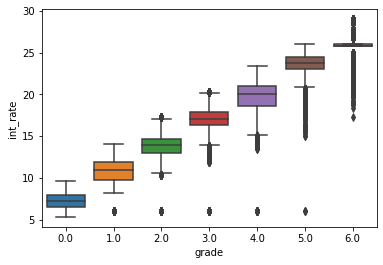

In [73]:
sns.boxplot('grade','int_rate',data=data)

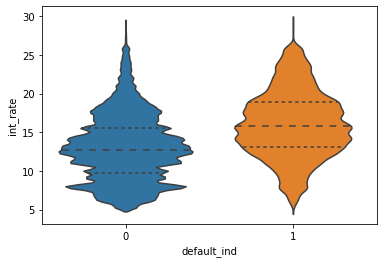

In [74]:
sns.violinplot('default_ind','int_rate',data=data,bw='scott',inner='quartile')

## annual_inc

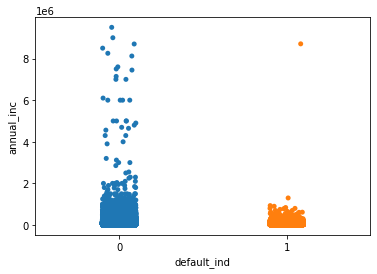

In [75]:
sns.stripplot('default_ind','annual_inc',data=data,jitter=True)

## inq_last_6mths

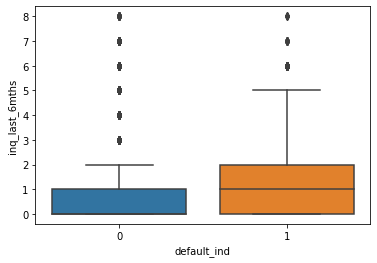

In [76]:
sns.boxplot('default_ind','inq_last_6mths',data=data)

## out_prncp

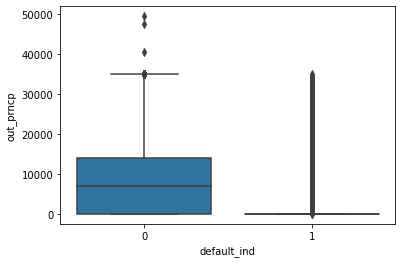

In [77]:
sns.boxplot('default_ind','out_prncp',data=data)

## total_pymnt

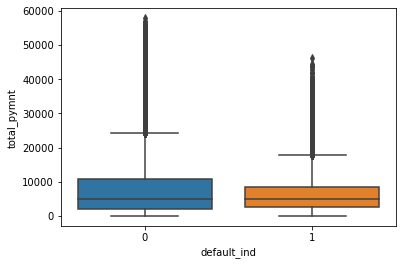

In [78]:
sns.boxplot('default_ind','total_pymnt',data=data)

## total_rec_prncp

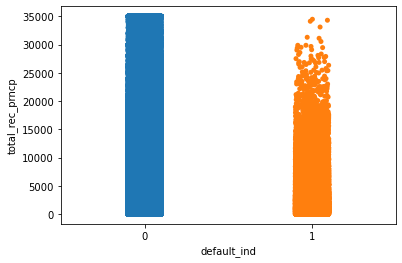

In [79]:
sns.stripplot('default_ind','total_rec_prncp',data=data,jitter=True)

## total_rec_int

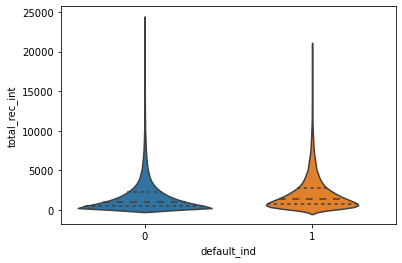

In [80]:
sns.violinplot('default_ind','total_rec_int',data=data,inner='quartile')

## recoveries

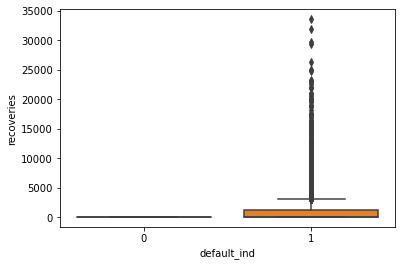

In [81]:
sns.boxplot('default_ind','recoveries',data=data)

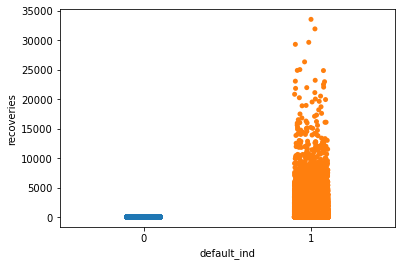

In [82]:
sns.stripplot('default_ind','recoveries',data=data,jitter=True)

## collection_recovery_fee

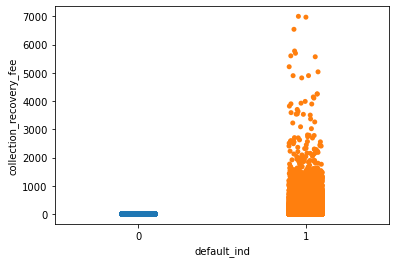

In [83]:
sns.stripplot('default_ind','collection_recovery_fee',data=data,jitter=True)

## last_pymnt_amnt

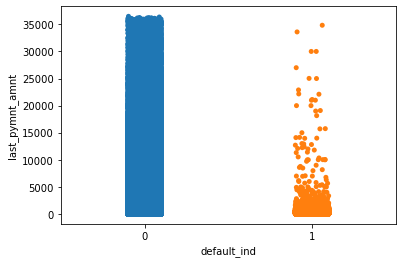

In [84]:
sns.stripplot('default_ind','last_pymnt_amnt',data=data,jitter=True)

In [85]:
data.head()

,VStatus_Not Verified,VStatus_Source Verified,VStatus_Verified,term,int_rate,grade,emp_length,home_ownership,annual_inc,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,Month,Year,default_ind
0,0,0,1,0.0,10.65,1.0,10.0,0.0,24000.0,1.0,3.0,13648.0,83.7,9.0,0.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,2016.0,0
1,0,1,0,1.0,15.27,2.0,0.0,0.0,30000.0,5.0,3.0,1687.0,9.4,4.0,0.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,9.0,2013.0,1
2,1,0,0,0.0,15.96,2.0,10.0,0.0,12252.0,2.0,2.0,2956.0,98.5,10.0,0.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,2016.0,0
3,0,1,0,0.0,13.49,2.0,10.0,0.0,49200.0,1.0,10.0,5598.0,21.0,37.0,0.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,2015.0,0
4,0,1,0,1.0,12.69,1.0,1.0,0.0,80000.0,0.0,15.0,27783.0,53.9,38.0,0.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1.0,2016.0,0


# Model Building

In [72]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [86]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
# from sklearn.utils import class_weight
# import xgboost
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

import itertools

In [87]:
us=NearMiss()
X_res,y_res=us.fit_sample(X,y)

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.25,random_state=0)

In [89]:
rc=RandomForestClassifier(n_estimators=10, criterion='entropy')

In [90]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cf_report=False,
                          title='Confusion matrix', ax=None, cmap=plt.cm.Blues, cbar=False):

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    if cf_report:
        print(classification_report(y_true,y_pred))
    
    fig, ax = (plt.gcf(), ax) if ax is not None else plt.subplots(1,1)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    
    if cbar:
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04) # "Magic" numbers (https://stackoverflow.com/a/26720422/10939610)
    
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [91]:
def plot_roc(y_true, y_pred, ax=None):
    """Plot ROC curve""" 
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_true, y_pred)
    roc_score = roc_auc_score(y_true,y_pred)
    
    fig, ax = (plt.gcf(), ax) if ax is not None else plt.subplots(1,1)

    ax.set_title("Receiver Operating Characteristic")
    ax.plot(false_positive_rate, true_positive_rate)
    ax.plot([0, 1], ls="--")
    ax.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    ax.annotate('ROC: {:.5f}'.format(roc_score), [0.75,0.05])
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")
    fig.tight_layout()
    return roc_score

In [92]:
def plot_cmroc(y_true, y_pred, classes=[0,1], normalize=True, cf_report=False):
    
    """Function to plot confusion matrix and ROC curve """
    
    fig,axes = plt.subplots(1,2, figsize=(9,4))
    plot_confusion_matrix(y_true, y_pred, classes=classes, normalize=normalize, cf_report=cf_report, ax=axes[0])
    roc_score = plot_roc(y_true, y_pred, ax=axes[1])
    fig.tight_layout()
    plt.show()
    return roc_score

In [93]:
y_pred=rc.fit(X_train,y_train).predict(X_test)
y_pred_prob=rc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11607
           1       0.99      0.97      0.98     11627

    accuracy                           0.98     23234
   macro avg       0.98      0.98      0.98     23234
weighted avg       0.98      0.98      0.98     23234



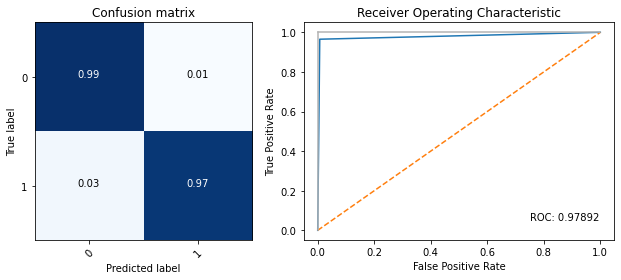

In [94]:
rc_underSample = plot_cmroc(y_test, y_pred, cf_report=True)

In [95]:
print(confusion_matrix(y_test,y_pred))

[[11523    84]
 [  406 11221]]


In [96]:
acc=cross_val_score(estimator=rc,X=X_train,y=y_train,cv=10)
acc.mean()

0.9806599713055955

<BarContainer object of 27 artists>

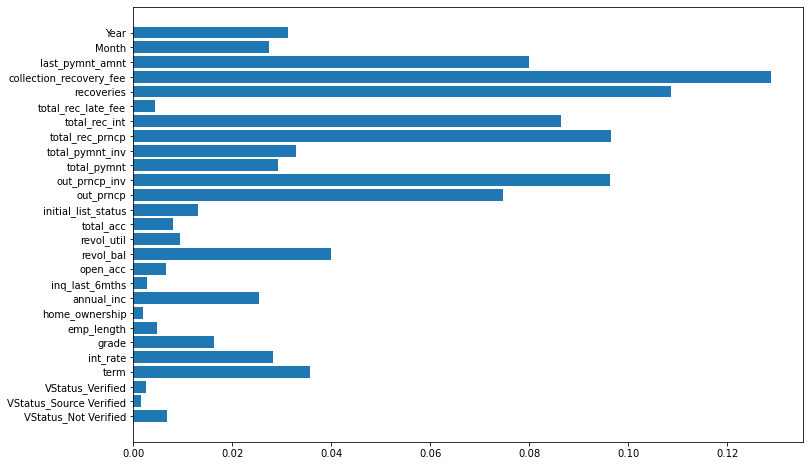

In [122]:
plt.figure(figsize=(12,8))
plt.barh(data.iloc[:,:-1].columns, rc.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

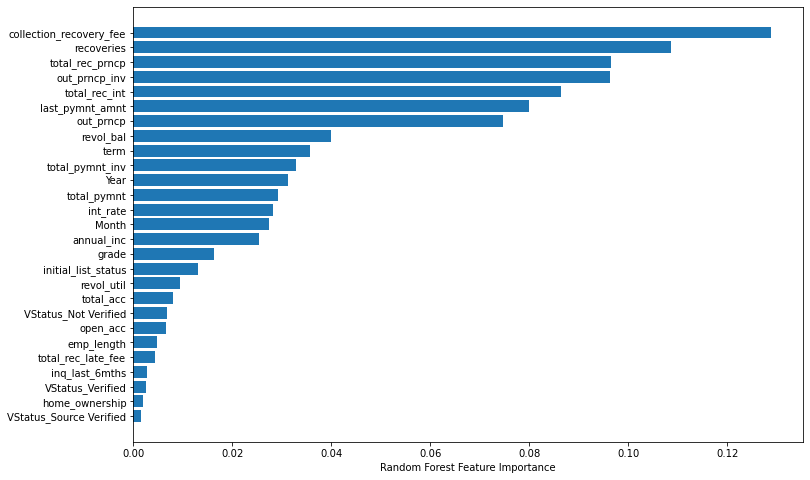

In [121]:
sorted_idx = rc.feature_importances_.argsort()
plt.figure(figsize=(12,8))
plt.barh(data.iloc[:,:-1].columns[sorted_idx], rc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Conclusions

- Fields like Zip code & policy code barely are of any significance so such fields can be ignored
from our study.
- Based on annual income & purpose, lending organization can decide how much loan to finance.
For e.g.- if a customer has a higher salary or source of income is fixed, he can be financed loan.
- Columns depicting delinquency can be kept in binarized format by bank. So if someone has no
default history it can be taken as zero and if someone has defaulted in 1 or more than 1 month
can be simply labelled as 1 i.e. delinquency.
- A higher interest rate can be charged from those who have defaulted as a form of penalty, so
they don’t default from next time.
- Successful payers should be given priority in terms loan grant.
- Finally, Random Forest model gave a list of important features for this entire process that can be
considered by bank while issuing loan.
